<a href="https://colab.research.google.com/github/KeneKing12/Kenechukwu/blob/main/Lab_5_Kenechukwu_K_Odoh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.


In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "svm"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Linear SVM Classification

The next few code cells generate the first figures in chapter 5. The first actual code sample comes after.

Code to generate Figure 5–1. Large margin classification

In [ ]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

SVC(C=inf, kernel='linear')

Saving figure large_margin_classification_plot


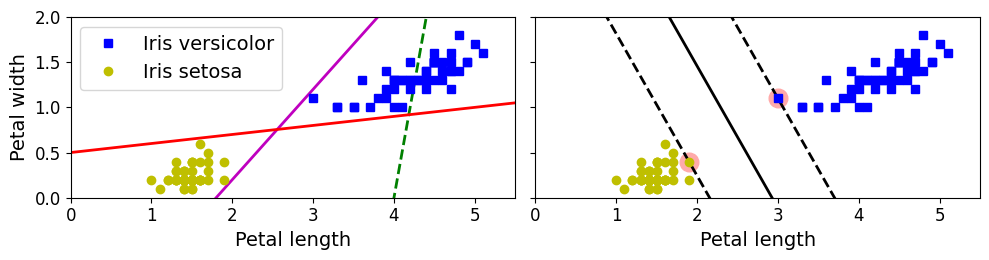

In [ ]:
# Bad models
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])

save_fig("large_margin_classification_plot")
plt.show()

Saving figure sensitivity_to_feature_scales_plot


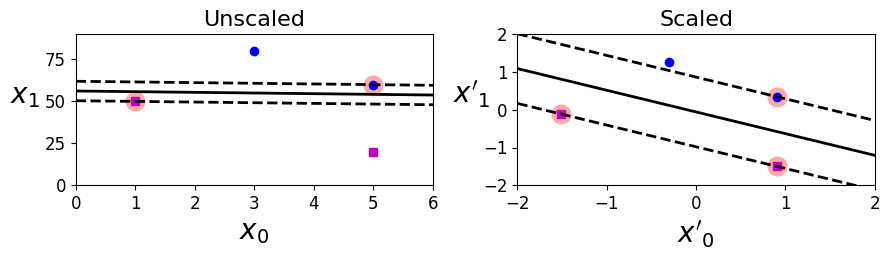

In [ ]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

plt.figure(figsize=(9,2.7))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$    ", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)
plt.axis([0, 6, 0, 90])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x'_0$", fontsize=20)
plt.ylabel("$x'_1$  ", fontsize=20, rotation=0)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])

save_fig("sensitivity_to_feature_scales_plot")


## Soft Margin Classification
**Code to generate Figure 5–3. Hard margin sensitivity to outliers**

Saving figure sensitivity_to_outliers_plot


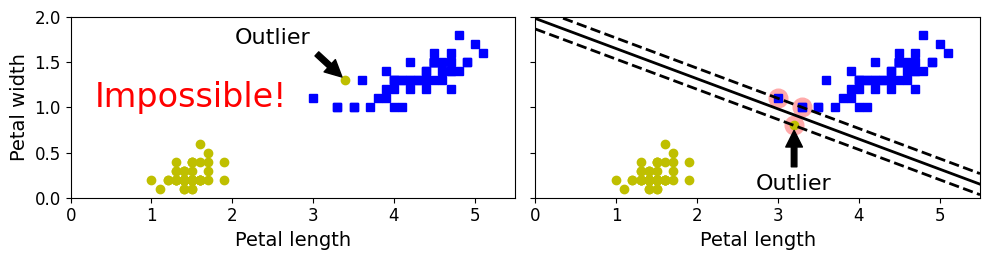

In [ ]:
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.text(0.3, 1.0, "Impossible!", fontsize=24, color="red")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[0][0], X_outliers[0][1]),
             xytext=(2.5, 1.7),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal length", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

save_fig("sensitivity_to_outliers_plot")
plt.show()

**This is the first code example in chapter 5:**

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica

svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
    ])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

In [ ]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

**Code to generate Figure 5–4. Large margin versus fewer margin violations**

In [ ]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=100, loss='hinge', random_state=42))])

In [ ]:
# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

Saving figure regularization_plot


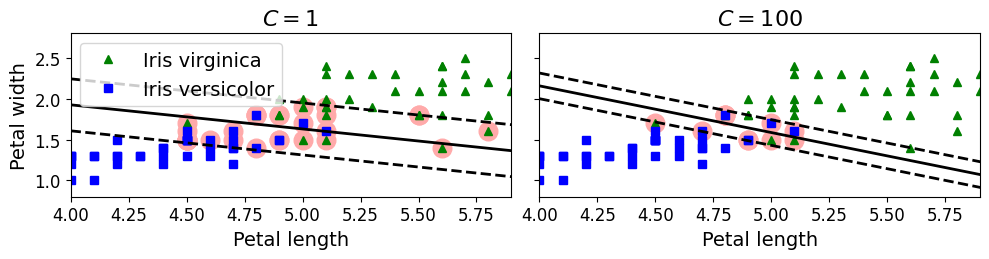

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 5.9)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

plt.sca(axes[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 5.99)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

save_fig("regularization_plot")

Train an SVM Classifier on the MNIST Dataset


In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]



```
# This is formatted as code
```


#Import Libraries
```

```



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import fetch_openml


#Load the MNIST Dataset

In [ ]:
# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target'].astype(int)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Grid search for Polynomal Kernel(optmizing degre, C, and coef0)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.model_selection import train_test_split

mnist = datasets.fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"]
y = y.astype(int)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42, stratify=y)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


param_grid_poly = {
    'C': [0.1, 10],   # Fewer values
    'degree': [2, 3],  # Focus on common degrees
    'coef0': [0.0, 0.5]  # Fewer values for coef0
}
svm_poly = SVC(kernel="poly")
grid_search_poly = GridSearchCV(svm_poly, param_grid_poly, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search_poly.fit(X_train_scaled, y_train)


print("Best hyperparameters for Polynomial Kernel:", grid_search_poly.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best hyperparameters for Polynomial Kernel: {'C': 10, 'coef0': 0.5, 'degree': 3}


#Grid Search for RBF kernel (Optimizing C and gamma)

In [ ]:
# Define the parameter grid for the RBF kernel
param_grid_rbf = {
    'C': [0.1, 1],
    'gamma': ['scale', 'auto', 0.001, 0.01],
    'kernel': ['rbf']
}

# Initialize SVM classifier
svm_rbf = SVC()

# Perform Grid Search with Cross-Validation
grid_search_rbf = GridSearchCV(svm_rbf, param_grid_rbf, cv=5, scoring='accuracy', verbose=1)
grid_search_rbf.fit(X_train, y_train)

# Display best hyperparameters for RBF kernel
print("Best parameters for RBF kernel:", grid_search_rbf.best_params_)

# Use the best model from the grid search to make predictions on the test set
y_pred_rbf = grid_search_rbf.best_estimator_.predict(X_test)

# Generate and print the classification report
print("Classification Report for RBF Kernel SVM:")
print(classification_report(y_test, y_pred_rbf))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters for RBF kernel: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Classification Report for RBF Kernel SVM:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      6213
           1       0.97      0.98      0.98      7089
           2       0.95      0.95      0.95      6291
           3       0.94      0.94      0.94      6427
           4       0.95      0.96      0.96      6142
           5       0.95      0.95      0.95      5682
           6       0.97      0.98      0.97      6188
           7       0.96      0.95      0.96      6564
           8       0.95      0.93      0.94      6142
           9       0.95      0.93      0.94      6262

    accuracy                           0.96     63000
   macro avg       0.96      0.96      0.96     63000
weighted avg       0.96      0.96      0.96     63000



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Initialize and train the SVM classifier with a linear kernel
svm_linear = SVC(kernel='linear')

# Train the linear SVM
svm_linear.fit(X_train_scaled, y_train)

# Predict the labels for the test set
y_pred_linear = svm_linear.predict(X_test_scaled)

# Generate and print the classification report
print("Classification Report for Linear Kernel SVM:")
print(classification_report(y_test, y_pred_linear))

Classification Report for Linear Kernel SVM:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      6213
           1       0.94      0.98      0.96      7089
           2       0.88      0.90      0.89      6291
           3       0.88      0.89      0.88      6427
           4       0.89      0.93      0.91      6142
           5       0.88      0.87      0.87      5682
           6       0.95      0.94      0.94      6188
           7       0.92      0.92      0.92      6564
           8       0.92      0.83      0.87      6142
           9       0.90      0.86      0.88      6262

    accuracy                           0.91     63000
   macro avg       0.91      0.91      0.91     63000
weighted avg       0.91      0.91      0.91     63000



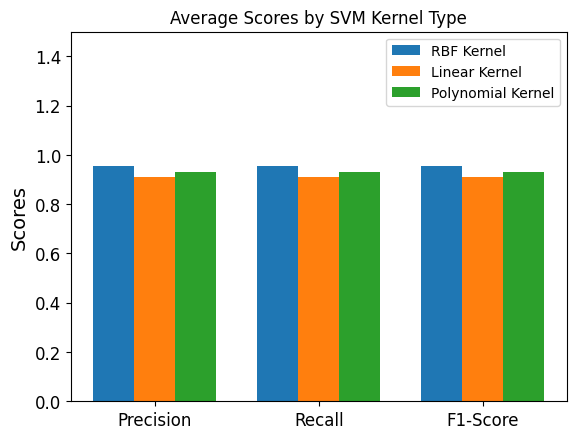

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
labels = ['Precision', 'Recall', 'F1-Score']
rbf_values = [0.955, 0.953, 0.954]
linear_values = [0.91, 0.91, 0.91]
poly_values = [0.93, 0.93, 0.93]


x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

# Plotting
fig, ax = plt.subplots()
bars1 = ax.bar(x - width, rbf_values, width, label='RBF Kernel')
bars2 = ax.bar(x, linear_values, width, label='Linear Kernel')
bars3 = ax.bar(x + width, poly_values, width, label='Polynomial Kernel')

# Adding labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Average Scores by SVM Kernel Type')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Show plot
plt.ylim(0, 1.5)  # Set y-axis limits
plt.show()


#Comparing SVM classifier Performance with Classifiers from Assignment 4 ( KNN, SDG, and Random Forest)

#Result of the classifiers from Assignment 4 is giving below

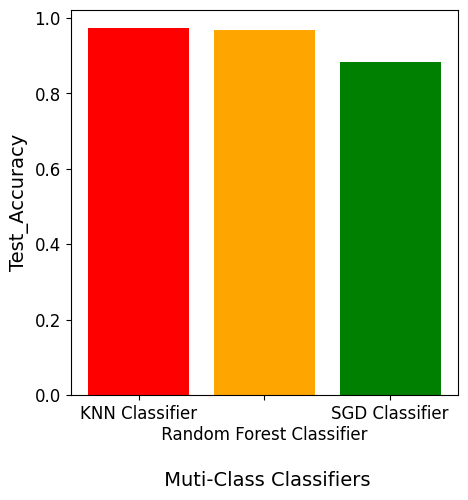

In [ ]:
import matplotlib.pyplot as plt

models = ['KNN Classifier', '\n Random Forest Classifier ', 'SGD Classifier']
Test_Accuracy = [0.9730639730639731, 0.9690847872666054, 0.882563003775125]
colors = ['red', 'orange', 'green', 'blue' ]

plt.figure(figsize=(5, 5))
plt.bar(models, Test_Accuracy, color=colors)

plt.ylabel('Test_Accuracy')
plt.xlabel('\n Muti-Class Classifiers')
plt.title('')
plt.show()

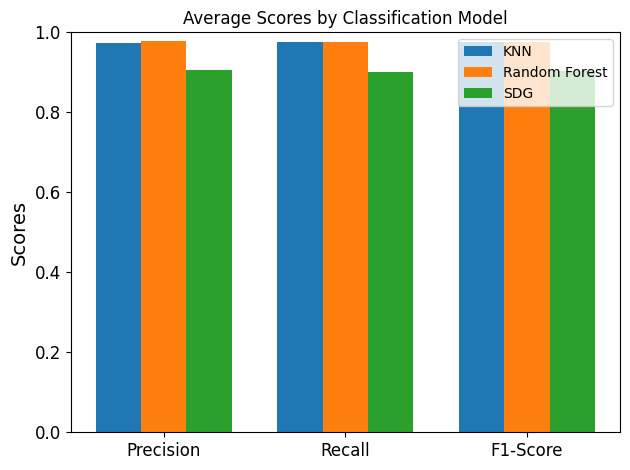

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
labels = ['Precision', 'Recall', 'F1-Score']
knn_values = [0.973, 0.976, 0.975]
rf_values = [0.978, 0.977, 0.975]
sdg_values = [0.906, 0.902, 0.904]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

# Plotting
fig, ax = plt.subplots()
bars1 = ax.bar(x - width, knn_values, width, label='KNN')
bars2 = ax.bar(x, rf_values, width, label='Random Forest')
bars3 = ax.bar(x + width, sdg_values, width, label='SDG')

# Adding labels, title, and custom x-axis tick labels
ax.set_ylabel('Scores')
ax.set_title('Average Scores by Classification Model')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Show plot
plt.ylim(0, 1)  # Set y-axis limits
plt.tight_layout()
plt.show()


In [6]:
# prompt: write a function that takes in a classifier and X and y train
# and then stop the time it takes to .fit and .predict and return these

import time
from sklearn.metrics import accuracy_score

def evaluate_classifier(classifier, X_train, y_train, X_test, y_test):
  """
  Evaluates the provided classifier and returns fit and predict times.

  Args:
    classifier: The classifier object to evaluate.
    X_train: Training data features.
    y_train: Training data labels.
    X_test: Testing data features.
    y_test: Testing data labels.

  Returns:
    A tuple containing the fit time, predict time, and the accuracy score.
  """

  start_time_fit = time.time()
  classifier.fit(X_train, y_train)
  fit_time = time.time() - start_time_fit

  start_time_predict = time.time()
  y_pred = classifier.predict(X_test)
  predict_time = time.time() - start_time_predict

  accuracy = accuracy_score(y_test, y_pred)

  return fit_time, predict_time, accuracy


# Example Usage
# (Make sure you have X_train, y_train, X_test, y_test defined before running this)

# svm_clf = SVC(kernel="linear", C=float("inf"))
# fit_time, predict_time, accuracy = evaluate_classifier(svm_clf, X_train, y_train, X_test, y_test)
# print("Fit Time:", fit_time)
# print("Predict Time:", predict_time)
# print("Accuracy:", accuracy)

In [ ]:
svm_clf = SVC(kernel="linear", C=float("inf"))
fit_time, predict_time, accuracy = evaluate_classifier(svm_clf, X_train, y_train, X_test, y_test)
print("Fit Time:", fit_time)
print("Predict Time:", predict_time)
print("Accuracy:", accuracy)

Fit Time: 4.528548240661621
Predict Time: 57.647069215774536
Accuracy: 0.9105873015873016


In [ ]:
# prompt: create svc poly using these params {'C': 10, 'coef0': 0.5, 'degree': 3} with evaluate_classifier, just create an instance yk and feed it into eval func

yk = SVC(kernel='poly', C=10, coef0=0.5, degree=3)
fit_time_poly, predict_time_poly, accuracy = evaluate_classifier(yk, X_train_scaled, y_train, X_test_scaled, y_test)
print("Fit Time:", fit_time_poly)
print("Predict Time:", predict_time_poly)
print("Accuracy:", accuracy)

Fit Time: 4.898999929428101
Predict Time: 77.125563621521
Accuracy: 0.9553015873015873


In [ ]:
# prompt: create svc rbf using these params {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'} with evaluate_classifier, just create an instance yk and feed it into eval func

yk = SVC(kernel='rbf', C=10, coef0=0.5, degree=3)
fit_time_rbf, predict_time_rbf, accuracy = evaluate_classifier(yk, X_train_scaled, y_train, X_test_scaled, y_test)
print("Fit Time:", fit_time_rbf)
print("Predict Time:", predict_time_rbf)
print("Accuracy:", accuracy)

Fit Time: 10.948540687561035
Predict Time: 172.94438004493713
Accuracy: 0.9386349206349206


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=4, weights='distance')
fit_time_knn, predict_time_knn, accuracy_knn = evaluate_classifier(knn_clf, X_train, y_train, X_test, y_test)

In [ ]:
print("KNN Classifier:")
print("Fit Time:", fit_time_knn)
print("Predict Time:", predict_time_knn)
print("Accuracy:", accuracy_knn)

KNN Classifier:
Fit Time: 0.01294088363647461
Predict Time: 41.050719022750854
Accuracy: 0.9467301587301588


In [ ]:
# prompt: create rf classifier using  RandomForestClassifier(max_depth=None, n_estimators= 500) and evaluate it

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming X_train, y_train, X_test, y_test are already defined

rf_classifier = RandomForestClassifier(max_depth=None, n_estimators=500, random_state=42)

fit_time_rf, predict_time_rf, accuracy_rf = evaluate_classifier(rf_classifier, X_train, y_train, X_test, y_test)

print("Random Forest Classifier:")
print("Fit Time:", fit_time_rf)
print("Predict Time:", predict_time_rf)
print("Accuracy:", accuracy_rf)

Random Forest Classifier:
Fit Time: 24.921014070510864
Predict Time: 8.603609561920166
Accuracy: 0.9465396825396826


In [ ]:
# prompt: create  sdg classifier using {'alpha': 0.01, 'learning_rate': 'optimal'} and evaluate it using our timeing function

from sklearn.linear_model import SGDClassifier

# Create an SGD classifier with the specified hyperparameters
sgd_classifier = SGDClassifier(alpha=0.01, learning_rate='optimal', random_state=42)

# Evaluate the SGD classifier using the evaluate_classifier function
fit_time_sgd, predict_time_sgd, accuracy_sgd = evaluate_classifier(sgd_classifier, X_train, y_train, X_test, y_test)

# Print the results
print("SGD Classifier:")
print("Fit Time:", fit_time_sgd)
print("Predict Time:", predict_time_sgd)
print("Accuracy:", accuracy_sgd)

SGD Classifier:
Fit Time: 6.597233295440674
Predict Time: 0.3498101234436035
Accuracy: 0.8626666666666667


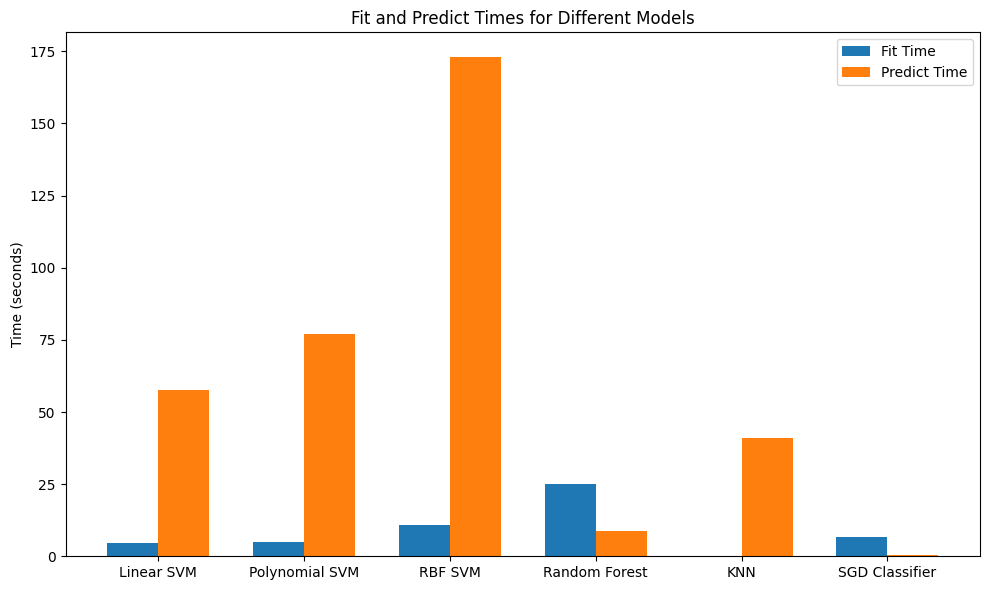

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Fit and predict times based on the actual values provided
fit_time_svm = 4.528548240661621  # Linear SVM
fit_time_poly = 4.898999929428101  # Polynomial SVM
fit_time_rbf = 10.948540687561035  # RBF SVM
fit_time_rf = 24.921014070510864  # Random Forest
fit_time_knn = 0.01294088363647461  # KNN
fit_time_sgd = 6.597233295440674  # SGD

predict_time_svm = 57.647069215774536  # Linear SVM
predict_time_poly = 77.125563621521  # Polynomial SVM
predict_time_rbf = 172.94438004493713  # RBF SVM
predict_time_rf = 8.603609561920166  # Random Forest
predict_time_knn = 41.050719022750854  # KNN
predict_time_sgd = 0.3498101234436035  # SGD

# Fit and predict times for all models
fit_times = [fit_time_svm, fit_time_poly, fit_time_rbf, fit_time_rf, fit_time_knn, fit_time_sgd]
predict_times = [predict_time_svm, predict_time_poly, predict_time_rbf, predict_time_rf, predict_time_knn, predict_time_sgd]
model_names = ['Linear SVM', 'Polynomial SVM', 'RBF SVM', 'Random Forest', 'KNN', 'SGD Classifier']

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Define width of bars
bar_width = 0.35

# Positions of the bars on the x-axis
x_pos = np.arange(len(model_names))

# Plot the fit times
rects1 = ax.bar(x_pos - bar_width / 2, fit_times, bar_width, label='Fit Time')

# Plot the predict times
rects2 = ax.bar(x_pos + bar_width / 2, predict_times, bar_width, label='Predict Time')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time (seconds)')
ax.set_title('Fit and Predict Times for Different Models')
ax.set_xticks(x_pos)
ax.set_xticklabels(model_names)
ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
